<a href="https://colab.research.google.com/github/Vedric/Trip-Advisor-Hotel-Reviews---NLP/blob/main/Trip_Advisor_Hotel_Reviews_NLP_%2C_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

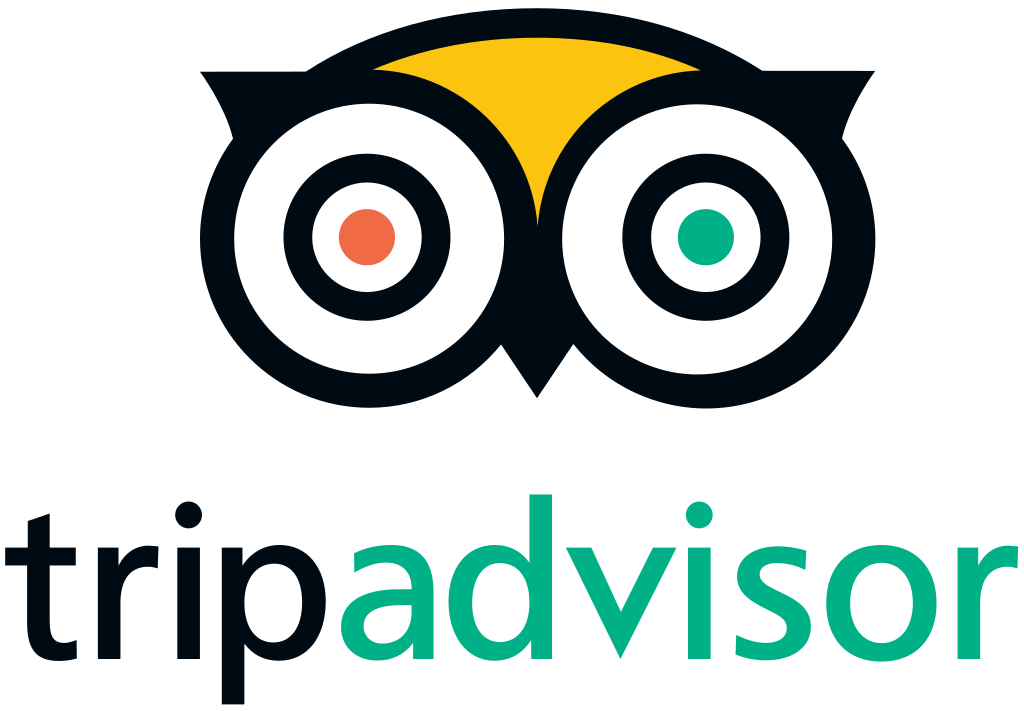

# Introduction

Les hôtels jouent un rôle vital dans les voyages, et avec l'augmentation de l'acquisition d'informations, de nouvelles méthodes pour choisir les meilleurs hôtels ont vu le jour. Avec cet ensemble de données de 20 000 avis de Tripadvisor, vous pouvez explorer ce qui fait un excellent hôtel, et vous pouvez même utiliser ce modèle dans vos voyages !

Les données de ce dataset sont les suivantes :

- Review - Avis de l'utilisateur
- Rating - Note de l'utilisateur sur 5

# 1. Importation des librairies

In [1]:
import sys
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv
Saving tripadvisor.png to tripadvisor.png


# 2. Lecture et découverte du dataset 

In [2]:
# Affichage des 10 premières lignes

df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [3]:
# Affichage des 10 dernières lignes

df.tail(10)

,Review,Rating
20481,ok price look hotel ok little run average clea...,2
20482,great choice wife chose best western quite bit...,5
20483,good bed clean convenient just night happy sta...,4
20484,deceptive staff deceptive desk staff claiming ...,2
20485,not impressed unfriendly staff checked asked h...,2
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [4]:
# Affichage des informations du dataset

df.info

<bound method DataFrame.info of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,20491.0,3.952223,1.23303,1.0,3.0,4.0,5.0,5.0


Il y a donc 20 491 commentaires au total , la moyenne des commentaires est d'environ de 4 / 5 !

In [6]:
# Forme de notre dataset

df.shape

(20491, 2)

In [7]:
# Le dataset ne présente aucune valeur manquante

df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [8]:
# Nombre de commentaire en fonctions des différentes notations

df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

# 3. Visualisation

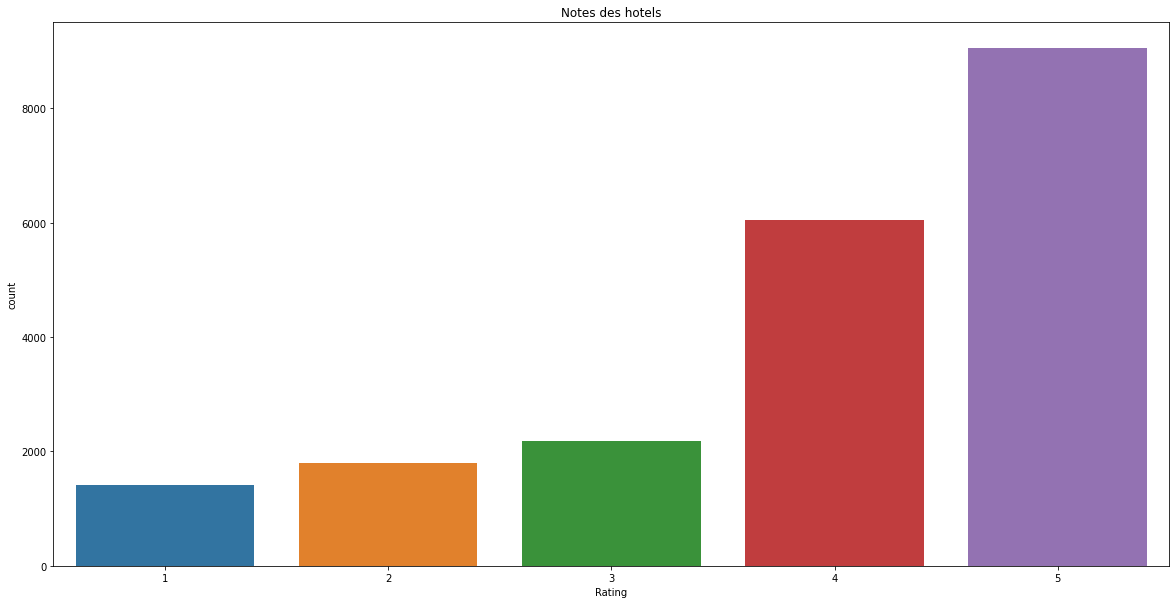

In [9]:
# Affichage du nombre d'avis en fonction de la notation

plt.figure(figsize=(20,10))
sns.countplot(df["Rating"])
plt.title("Notes des hotels");

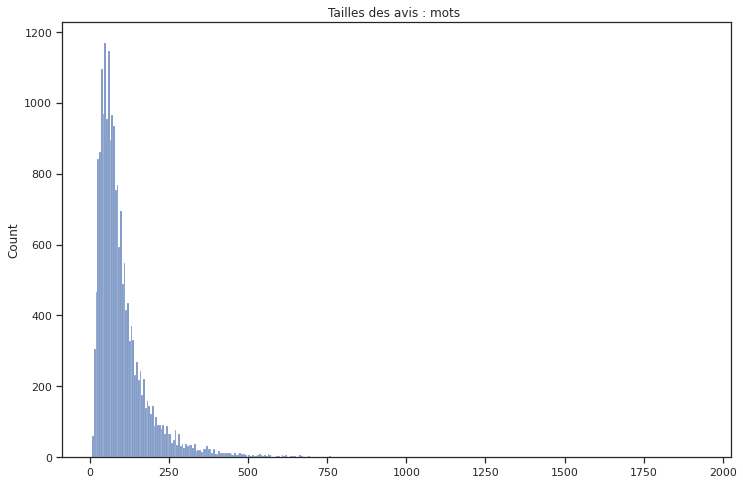

In [15]:
# Affichage de la distribution du nombre d'avis 

review_len = pd.Series([len(review.split()) for review in df['Review']])

sns.set_theme(
    context='notebook',
    style='ticks',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
plt.figure(figsize=(12,8))
plt.title('Tailles des avis : mots ')
sns.histplot(review_len);


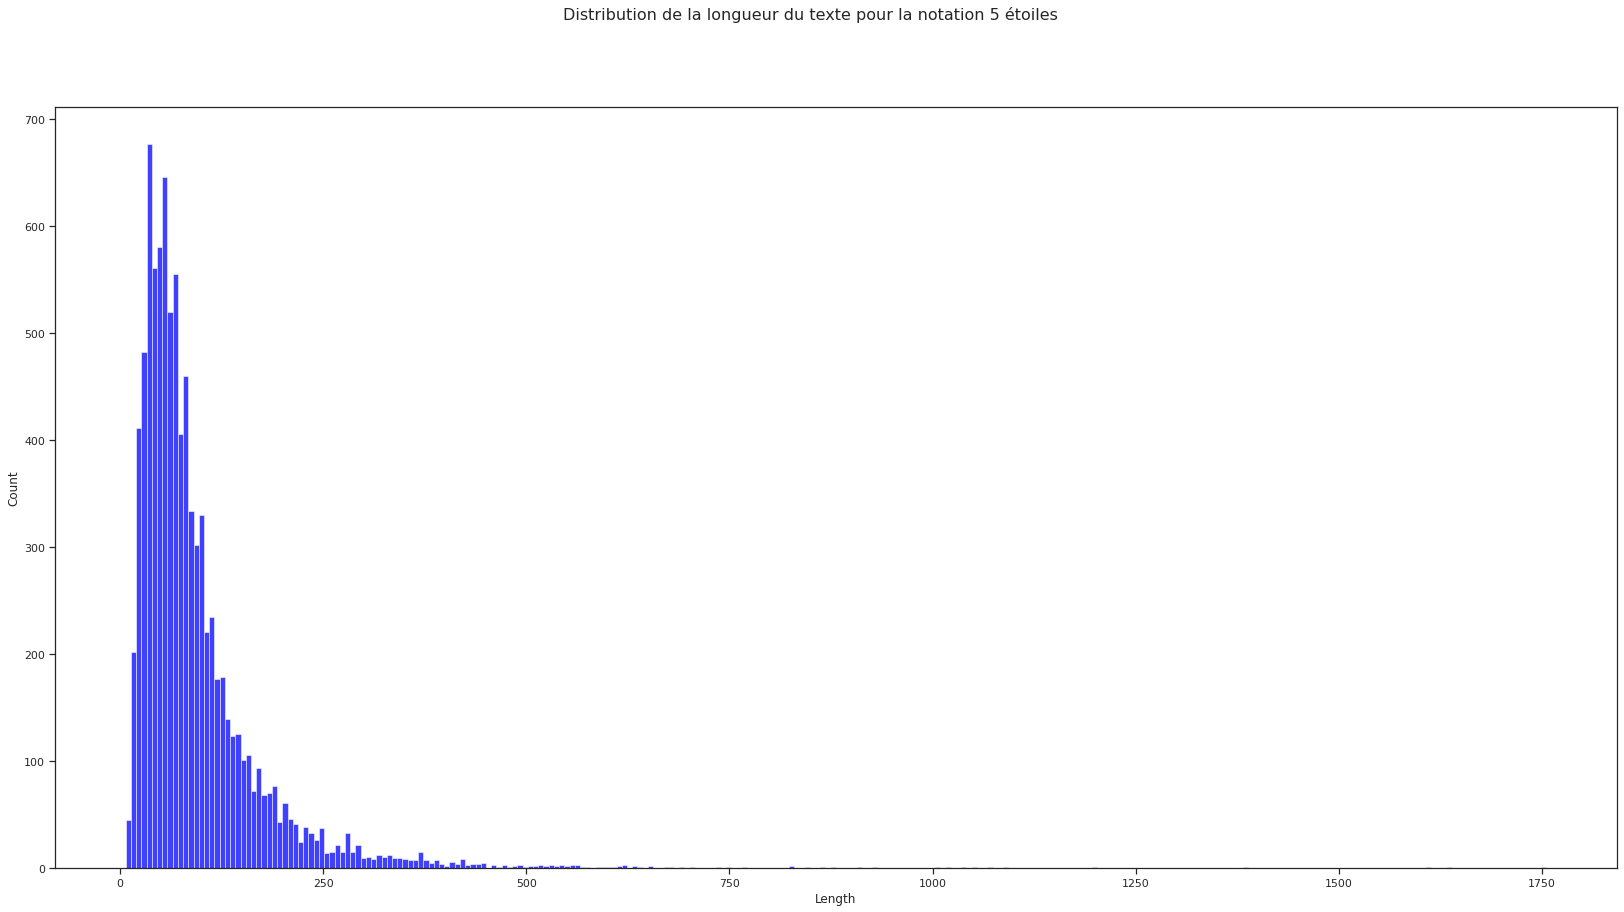

In [26]:
# Distribution de la longueur du texte pour la notation 5 étoiles

fig = plt.figure(figsize=(28,14))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(111)
sns.histplot(df[df['Rating']==5]['Length'], ax=ax1,color='blue')
fig.suptitle('Distribution de la longueur du texte pour la notation 5 étoiles', fontsize=16);

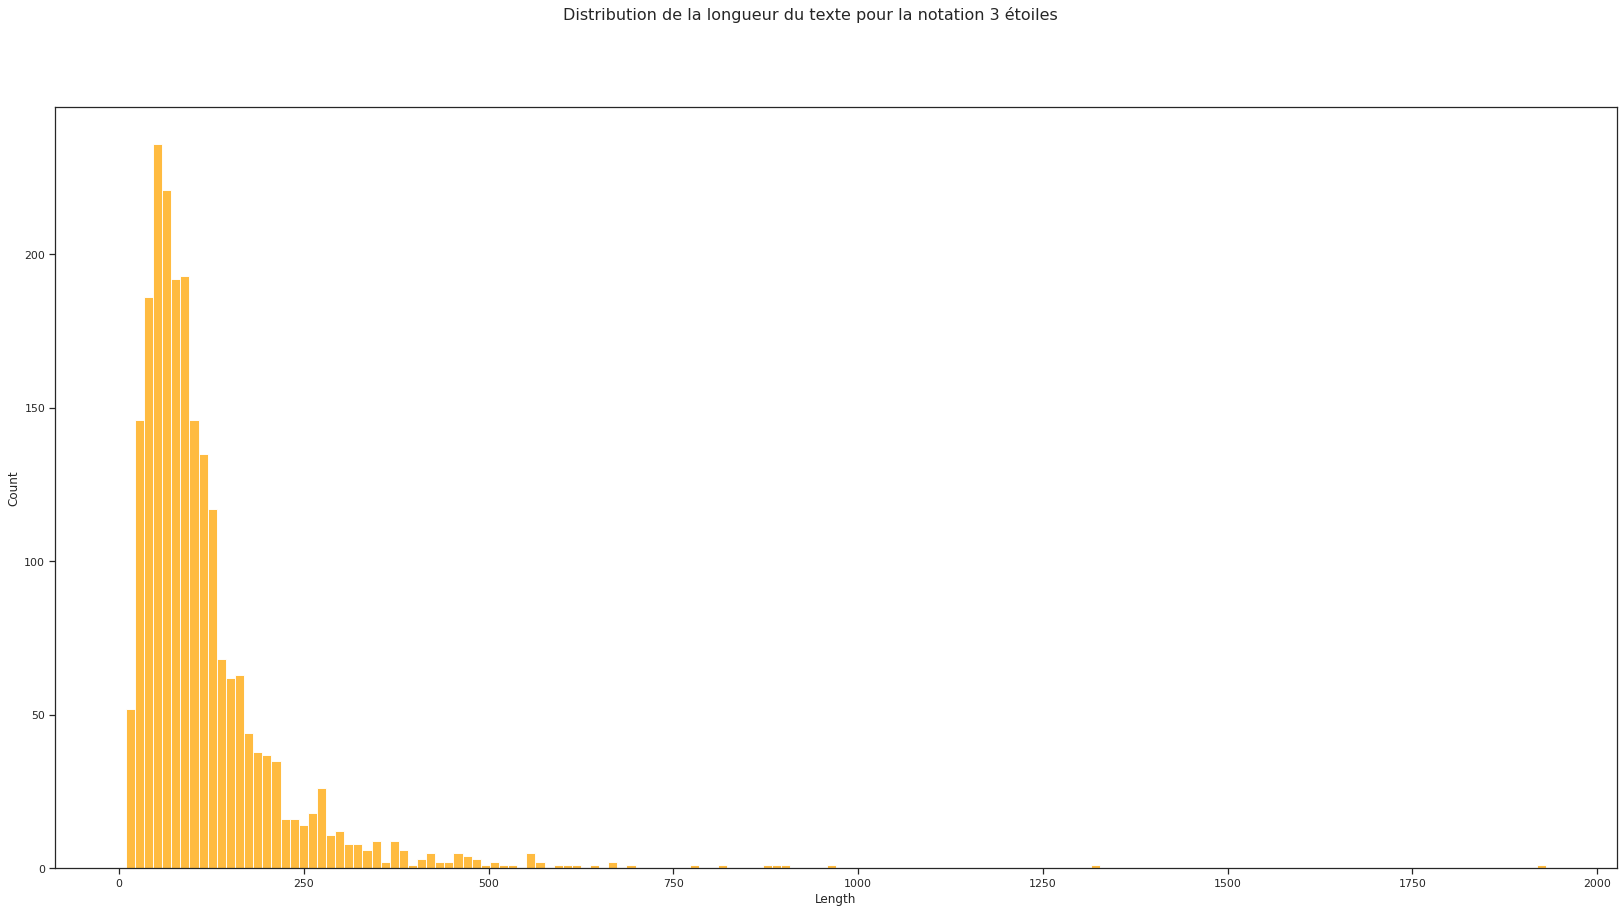

In [30]:
# Distribution de la longueur du texte pour la notation 3 étoiles

fig = plt.figure(figsize=(28,14))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(111)
sns.histplot(df[df['Rating']==3]['Length'], ax=ax1,color='orange')
fig.suptitle('Distribution de la longueur du texte pour la notation 3 étoiles', fontsize=16);

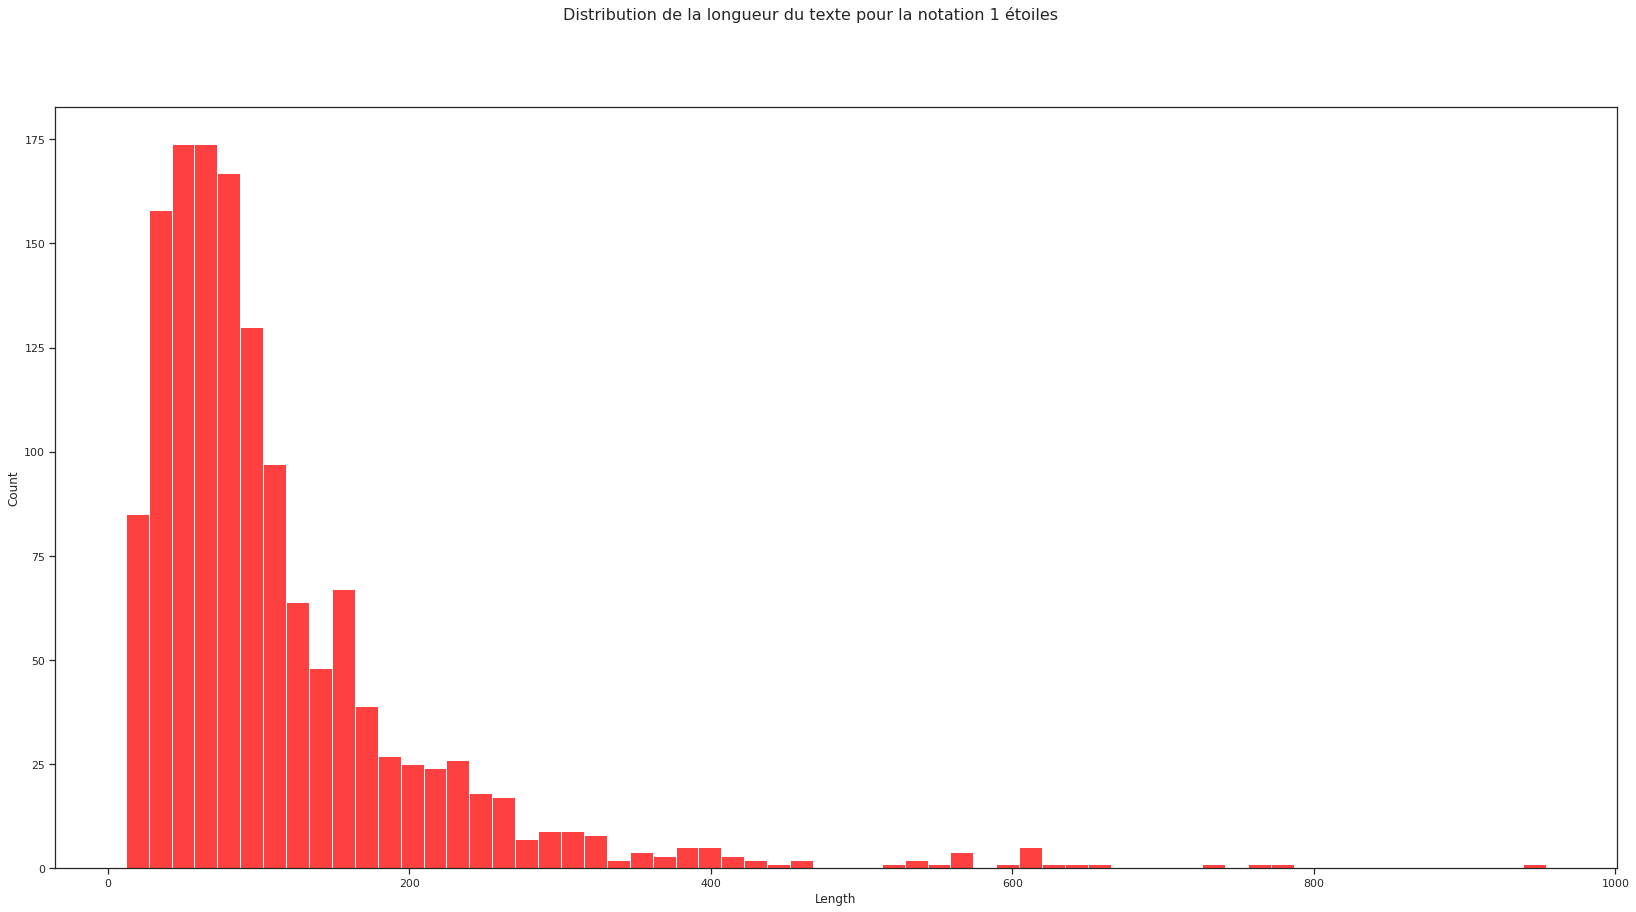

In [31]:
# Distribution de la longueur du texte pour la notation 1 étoiles

fig = plt.figure(figsize=(28,14))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(111)
sns.histplot(df[df['Rating']==1]['Length'], ax=ax1,color='red')
fig.suptitle('Distribution de la longueur du texte pour la notation 1 étoiles', fontsize=16);

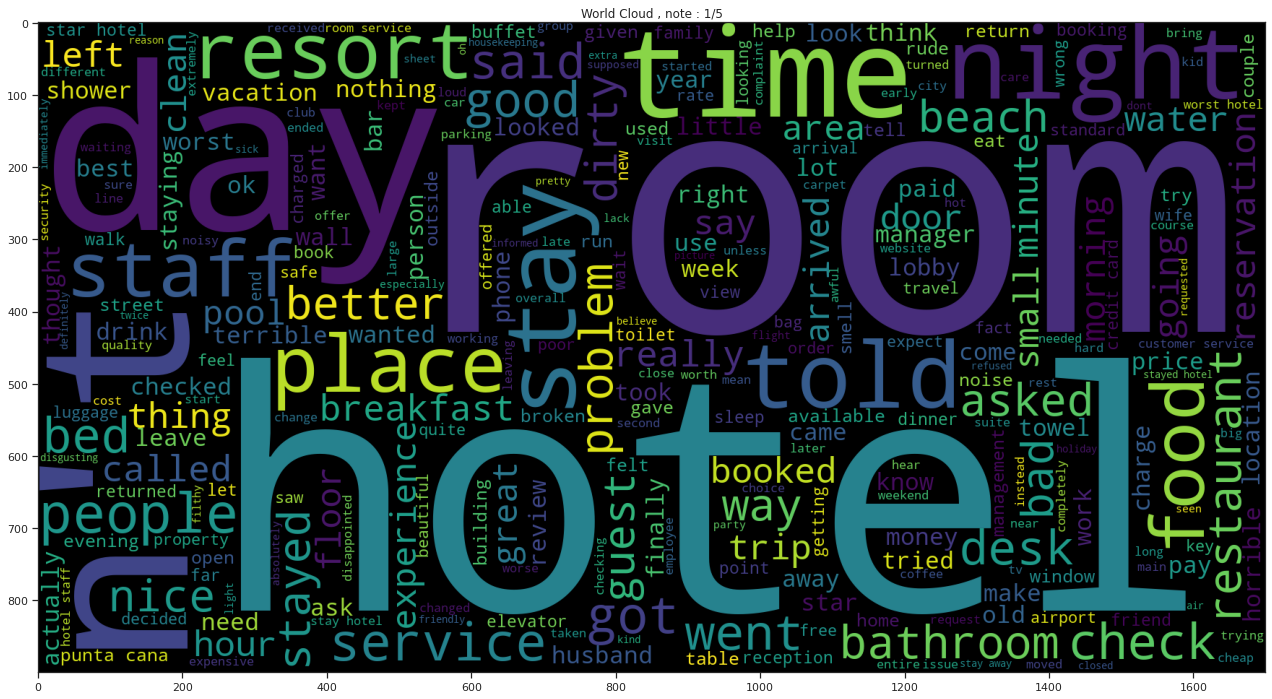

In [35]:
from wordcloud import WordCloud
plt.figure(figsize=(22,22))
wc1 = WordCloud(max_words=1700, min_font_size=13, 
                height=900,width=1700,background_color="black").generate(" ".join(df[df["Rating"]==1].Review))
plt.imshow(wc1)
plt.title('World Cloud , note : 1/5');

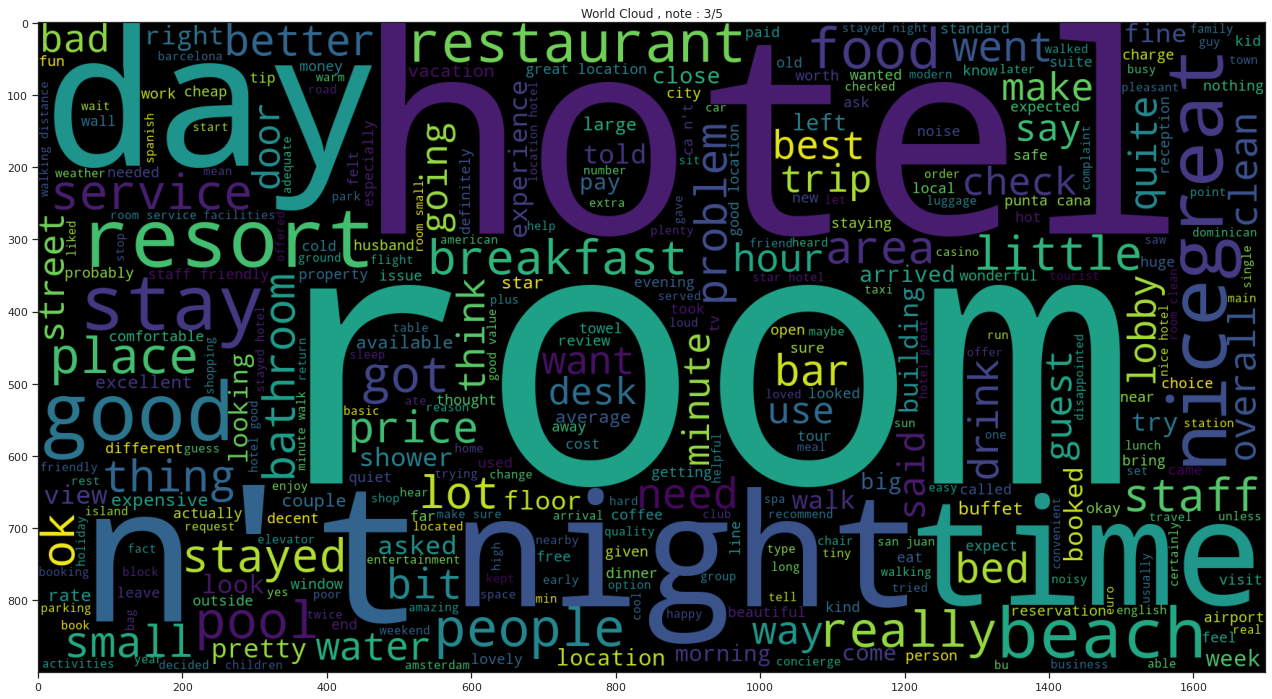

In [36]:
from wordcloud import WordCloud
plt.figure(figsize=(22,22))
wc1 = WordCloud(max_words=1700, min_font_size=13, 
                height=900,width=1700,background_color="black").generate(" ".join(df[df["Rating"]==3].Review))
plt.imshow(wc1)
plt.title('World Cloud , note : 3/5');

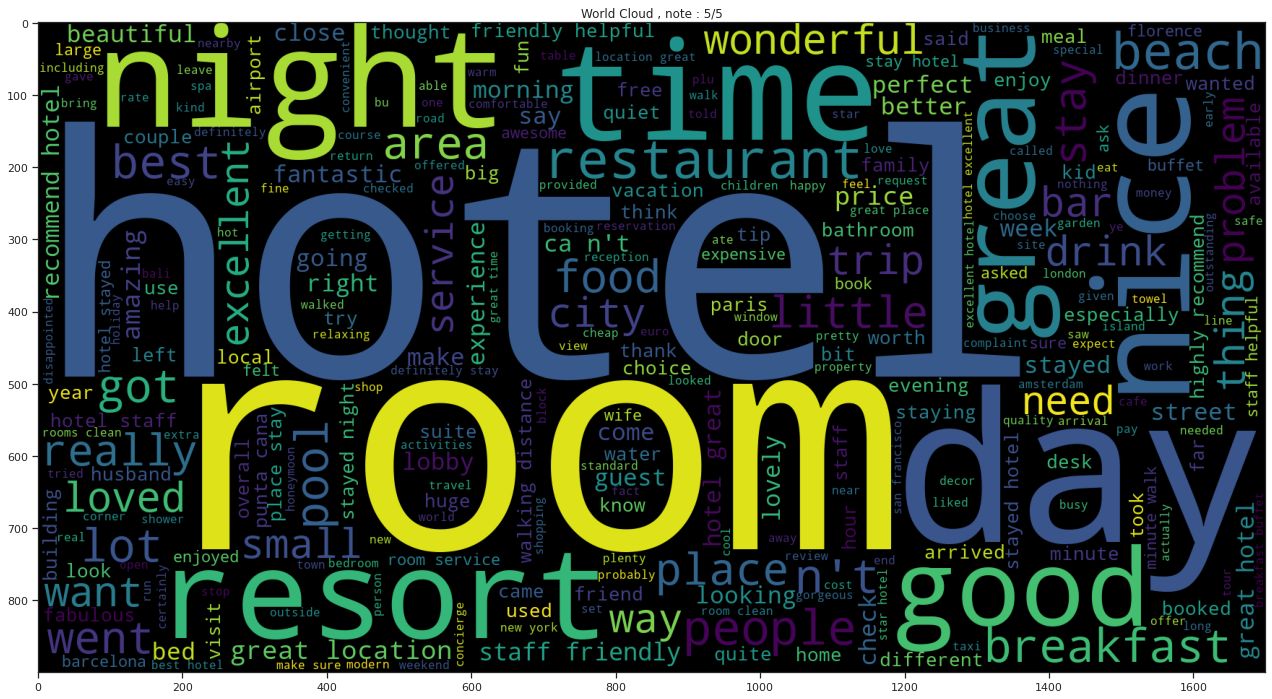

In [37]:
from wordcloud import WordCloud
plt.figure(figsize=(22,22))
wc1 = WordCloud(max_words=1700, min_font_size=13, 
                height=900,width=1700,background_color="black").generate(" ".join(df[df["Rating"]==5].Review))
plt.imshow(wc1)
plt.title('World Cloud , note : 5/5');

# 4. Natural Langage Processing

In [ ]:
# Définir une fonction de Sentiment Analysis

def sentiment_analysis(review):
    if review >= 3:
        return 1
    else:
        return 0
df['Sentiment Analysis']= df['Rating'].apply(sentiment)

In [ ]:
df.head(10)

,Review,Rating,Sentiment Analysis
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
5,love monaco staff husband stayed hotel crazy w...,5,1
6,"cozy stay rainy city, husband spent 7 nights m...",5,1
7,"excellent staff, housekeeping quality hotel ch...",4,1
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1
9,excellent stayed hotel monaco past w/e delight...,5,1


### Entrainement de notre modèle

In [ ]:
# Entrainement de notre modèle

X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(df['Review']).toarray(),
                                                 df['Sentiment Analysis'].values,
                                                 test_size = 0.25,
                                                 random_state = 24)

In [ ]:
print("Train Features : ",X_train.shape)
print("Train Labels   : ",Y_train.shape)
print("Test Features  : ",X_test.shape)
print("Test Labels    : ",Y_test.shape)

Train Features :  (15368, 52650)
Train Labels   :  (15368,)
Test Features  :  (5123, 52650)
Test Labels    :  (5123,)


### Régression logistique

In [ ]:
LR = LogisticRegression(solver='liblinear',random_state=0)
LR.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

Train Accuracy : 94.93 %
Test Accuracy  : 92.19 %


Nous pouvons voir que nous arrivons à un très bon résultat avec une simple régression logistique.